<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/Internship_Task1_retail_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


In [2]:
%matplotlib inline

In [3]:
rcParams['figure.figsize'] = [14,10]

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/New folder/Transactions.csv')

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/New folder/Customer.csv')

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/New folder/prod_cat_info.csv')

In [7]:
df1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [8]:
df2

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [9]:
df3

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [10]:
df1.rename({'cust_id':'customer_Id','prod_subcat_code':'prod_sub_cat_code'},axis=1,inplace=True)

In [11]:
df1

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [12]:
df1_2 = pd.merge(df1,df2)

In [13]:
df1_2

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,10-06-1972,M,10.0
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,17-07-1975,M,4.0
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,27-12-1972,M,5.0
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,09-09-1977,F,3.0


In [14]:
df = pd.merge(df1_2,df3,on=['prod_sub_cat_code','prod_cat_code'])

#1. Merging the dataset is done using common attributes

In [15]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


#2.To check the null values

In [16]:
df.isnull().sum()

transaction_id       0
customer_Id          0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
DOB                  0
Gender               9
city_code            8
prod_cat             0
prod_subcat          0
dtype: int64

#3.To check the duplicate values 

In [17]:
df[df.duplicated()]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
1360,44125492691,274748,19-12-2011,3,2,-5,-767,402.675,-4237.675,e-Shop,22-06-1991,M,1.0,Footwear,Women
2866,4170892941,266852,21-12-2011,8,3,-1,-412,43.260,-455.260,MBR,15-01-1990,M,5.0,Electronics,Personal Appliances
2946,95523406151,273937,16-09-2012,8,3,-5,-483,253.575,-2668.575,e-Shop,19-11-1975,M,5.0,Electronics,Personal Appliances
6971,68625357665,270229,24-04-2012,12,6,-5,-79,41.475,-436.475,Flagship store,01-12-1977,M,9.0,Home and kitchen,Tools
9151,48727689115,270330,21-10-2012,4,3,-4,-1158,486.360,-5118.360,TeleShop,13-07-1981,M,3.0,Electronics,Mobiles
10774,54818572958,274656,19-07-2013,11,6,-5,-662,347.550,-3657.550,e-Shop,03-02-1987,M,5.0,Home and kitchen,Bath
12898,98271941861,267939,29-06-2011,10,5,-4,-1238,519.960,-5471.960,Flagship store,18-03-1985,F,1.0,Books,Non-Fiction
18258,426787191,273106,28-05-2012,1,2,-5,-109,57.225,-602.225,e-Shop,23-03-1970,F,2.0,Footwear,Mens
18273,93088859112,272584,4/11/2012,1,2,-1,-1168,122.640,-1290.640,e-Shop,20-12-1979,M,2.0,Footwear,Mens
19913,42255136382,270202,25-08-2012,12,5,-4,-841,353.220,-3717.220,e-Shop,18-07-1985,F,9.0,Books,Academic


#dropping the duplicates

In [18]:
df = df.drop_duplicates()

In [19]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


#4. Summary report for the dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23040 non-null  int64         
 1   customer_Id        23040 non-null  int64         
 2   tran_date          23040 non-null  datetime64[ns]
 3   prod_sub_cat_code  23040 non-null  int64         
 4   prod_cat_code      23040 non-null  int64         
 5   Qty                23040 non-null  int64         
 6   Rate               23040 non-null  int64         
 7   Tax                23040 non-null  float64       
 8   total_amt          23040 non-null  float64       
 9   Store_type         23040 non-null  object        
 10  DOB                23040 non-null  object        
 11  Gender             23040 non-null  object        
 12  city_code          23040 non-null  float64       
 13  prod_cat           23040 non-null  object        
 14  prod_s

In [20]:
df.describe(include='all')

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
count,2.304000e+04,23040.000000,23040,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040,23040,23031,23032.000000,23040,23040
unique,NaN,NaN,1129,NaN,NaN,NaN,NaN,NaN,NaN,4,3987,2,NaN,6,18
top,NaN,NaN,13-07-2011,NaN,NaN,NaN,NaN,NaN,NaN,e-Shop,27-12-1988,M,NaN,Books,Women
freq,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,9304,32,11804,NaN,6066,3046
mean,5.006955e+10,271021.880252,NaN,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,NaN,NaN,NaN,5.483067,NaN,NaN
std,2.898062e+10,2431.573668,NaN,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,NaN,NaN,NaN,2.863331,NaN,NaN
min,3.268991e+06,266783.000000,NaN,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.493315e+10,268935.000000,NaN,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,NaN,NaN,NaN,3.000000,NaN,NaN
50%,5.009188e+10,270980.500000,NaN,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,NaN,NaN,NaN,5.000000,NaN,NaN
75%,7.532632e+10,273114.250000,NaN,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,NaN,NaN,NaN,8.000000,NaN,NaN


In [21]:
col = df.columns

In [22]:
col

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

#To check any abrupt symbols like ?,*,# etc

In [23]:
for i in col:
  print(df[i].value_counts())

32263938079    4
91530082461    3
55389581056    3
86293071463    3
56454025977    3
              ..
65467518006    1
94174237977    1
66102349304    1
75826581518    1
83245680995    1
Name: transaction_id, Length: 20878, dtype: int64
268819    13
269449    13
270831    12
266794    12
274227    12
          ..
271255     1
266861     1
268407     1
273528     1
273723     1
Name: customer_Id, Length: 5506, dtype: int64
13-07-2011    35
22-11-2011    33
25-09-2011    33
21-12-2013    33
23-10-2011    33
              ..
24-02-2014     2
23-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64
4     4000
3     3065
10    2991
1     2948
11    2057
12    2027
7     1043
2     1007
6      989
9      985
8      970
5      958
Name: prod_sub_cat_code, dtype: int64
5    6066
3    4895
6    4126
2    2996
1    2960
4    1997
Name: prod_cat_code, dtype: int64
 5    4259
 1    4214
 3    4174
 2    4123
 4    4106
-4     455
-5     452
-2

#Imputing the null values

In [24]:
df['Gender'] = df['Gender'].fillna('F')

<ipython-input-24-be830cdf5d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].fillna('F')


In [25]:
df['city_code'].value_counts()

4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: city_code, dtype: int64

In [26]:
df.dtypes

transaction_id         int64
customer_Id            int64
tran_date             object
prod_sub_cat_code      int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_subcat           object
dtype: object

In [27]:
df['city_code'] = df['city_code'].fillna(4.0)

<ipython-input-27-548ff41dedec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_code'] = df['city_code'].fillna(4.0)


In [28]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


#Percentage of products bought by men and women (clothing)

In [29]:
df_cloth = df.loc[df['prod_cat']=='Clothing']

In [30]:
df_cloth

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,30969859246,269408,2/5/2011,3,1,2,346,72.660,764.660,Flagship store,27-03-1989,F,8.0,Clothing,Kids
17092,97999057947,268110,20-04-2011,3,1,2,433,90.930,956.930,e-Shop,06-03-1976,M,2.0,Clothing,Kids
17093,15281126640,269324,15-04-2011,3,1,1,1319,138.495,1457.495,TeleShop,10-12-1987,M,7.0,Clothing,Kids
17094,2884665309,274263,26-03-2011,3,1,5,1485,779.625,8204.625,Flagship store,11-02-1979,M,9.0,Clothing,Kids


In [31]:
count = df_cloth.groupby('Gender')['Qty'].sum()

In [32]:
count

Gender
F    3426
M    3748
Name: Qty, dtype: int64

In [33]:
y = np.array([3426,3748])

In [34]:
rcParams['font.size'] = 18

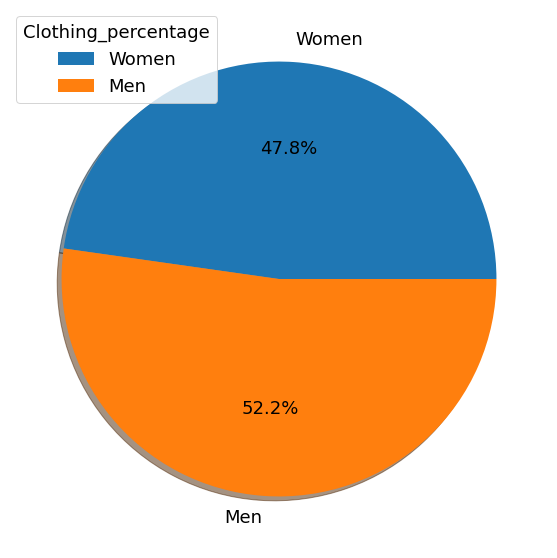

In [35]:
plt.pie(y,labels=['Women','Men'],shadow=True,autopct='%1.1f%%')
plt.legend(title='Clothing_percentage',loc='best')
plt.show()

#Percentage of products bought by men and women (footwear)

In [36]:
df_foot= df.loc[df['prod_cat']=='Footwear']

In [37]:
df_foot

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
1005,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,26-09-1981,M,5.0,Footwear,Women
1006,76683526413,273420,9/12/2013,3,2,1,528,55.440,583.440,MBR,27-07-1992,M,8.0,Footwear,Women
1007,62778587614,272357,26-08-2011,3,2,2,1198,251.580,2647.580,Flagship store,09-10-1982,F,6.0,Footwear,Women
1008,53315869427,273667,1/9/2012,3,2,5,1224,642.600,6762.600,TeleShop,29-05-1981,M,9.0,Footwear,Women
1009,43134751727,268487,20-02-2014,3,2,-1,-611,64.155,-675.155,e-Shop,10-06-1984,F,2.0,Footwear,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19018,61871893225,272287,15-06-2011,1,2,1,1233,129.465,1362.465,e-Shop,08-01-1987,F,5.0,Footwear,Mens
19019,93004318046,271700,13-05-2011,1,2,5,228,119.700,1259.700,e-Shop,07-10-1992,F,4.0,Footwear,Mens
19020,14315201709,268388,8/5/2011,1,2,2,481,101.010,1063.010,TeleShop,17-03-1976,M,8.0,Footwear,Mens
19021,31459308891,268002,15-03-2011,1,2,3,317,99.855,1050.855,MBR,13-04-1986,F,2.0,Footwear,Mens


In [38]:
count1 = df_foot.groupby('Gender')['Qty'].sum()

In [39]:
count1

Gender
F    3724
M    3561
Name: Qty, dtype: int64

In [40]:
y1 = np.array([3724,3561])

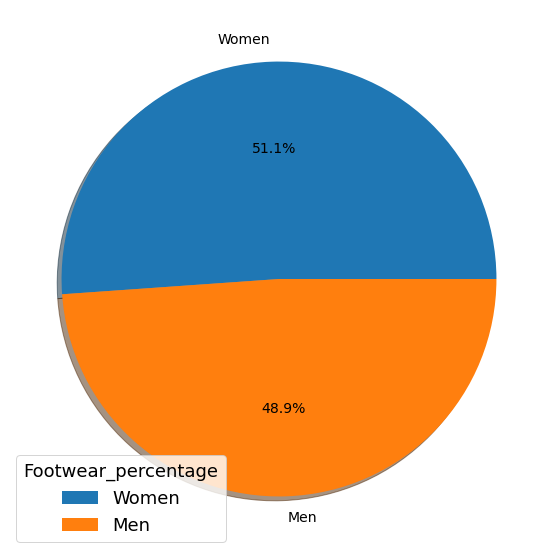

In [41]:
plt.pie(y1,labels=['Women','Men'],shadow=True,autopct='%1.1f%%',textprops={'fontsize':14})
plt.legend(title='Footwear_percentage',loc='best')
plt.show()

#How many types of stores are there, and which type of stores sells maximum of products?

In [42]:
pd.set_option('display.max_columns',20)

In [43]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [44]:
df['Store_type'].value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [45]:
df['Store_type'].nunique()

4

In [46]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [47]:
count3 = df.groupby('Store_type')['Qty'].sum()

In [48]:
count3

Store_type
Flagship store    11142
MBR               11195
TeleShop          10993
e-Shop            22790
Name: Qty, dtype: int64

In [49]:
y3 = np.array(count3)

In [50]:
y3

array([11142, 11195, 10993, 22790])

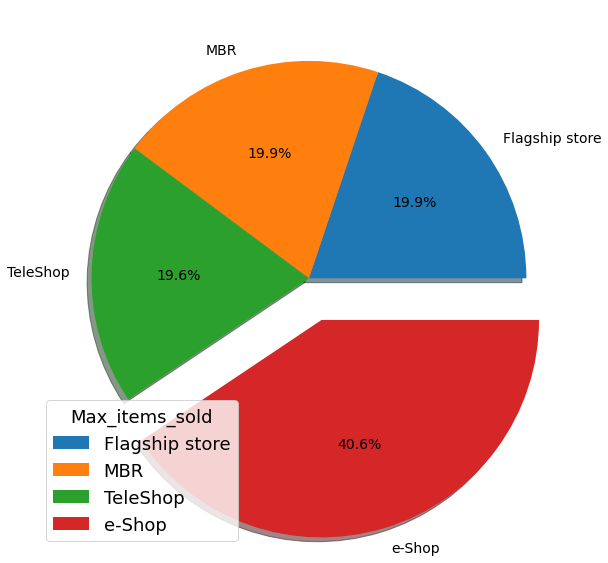

In [51]:
plt.pie(y3,labels=['Flagship store',    
'MBR',               
'TeleShop',          
'e-Shop'],shadow=True,autopct='%1.1f%%',explode=[0,0,0,0.2],textprops={'fontsize':14})
plt.legend(title='Max_items_sold',loc='lower left')
plt.show()

#Type of Book which is getting sold the most

In [52]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [53]:
df['prod_cat'].value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [54]:
df_books = df.loc[df['prod_cat']=='Books']

In [55]:
df_books

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
3025,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0,Books,DIY
3026,4116651679,270384,6/8/2013,6,5,1,1343,141.015,1484.015,TeleShop,11-05-1973,F,8.0,Books,DIY
3027,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3028,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3029,51750724947,273420,16-02-2014,6,5,2,791,166.110,1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,80633249807,267940,12/7/2011,3,5,4,1103,463.260,4875.260,TeleShop,09-06-1979,M,9.0,Books,Comics
22054,87103638186,270622,29-06-2011,3,5,5,1085,569.625,5994.625,TeleShop,13-06-1976,F,5.0,Books,Comics
22055,36133642880,272736,24-02-2011,3,5,3,173,54.495,573.495,e-Shop,19-04-1970,F,1.0,Books,Comics
22056,54971212536,269408,22-03-2011,3,5,3,563,177.345,1866.345,e-Shop,27-03-1989,F,8.0,Books,Comics


In [56]:
count2 = df_books.groupby('prod_subcat')['Qty'].sum()

In [57]:
count2

prod_subcat
Academic       2302
Children       2487
Comics         2450
DIY            2405
Fiction        2573
Non-Fiction    2462
Name: Qty, dtype: int64

In [58]:
y2 = np.array(count2)

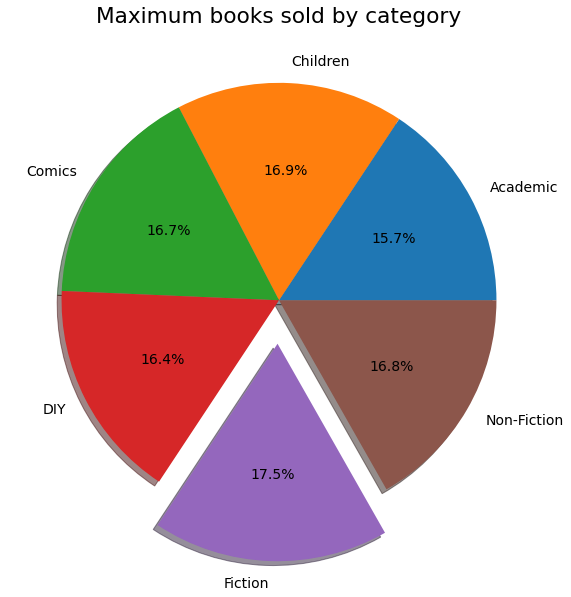

In [59]:
plt.pie(y2,labels=['Academic',    
'Children',               
'Comics',          
'DIY','Fiction','Non-Fiction'],shadow=True,autopct='%1.1f%%',explode=[0,0,0,0,0.2,0],textprops={'fontsize':14})
plt.title('Maximum books sold by category')
plt.show()

#Total amount spent by men on electronics 

In [60]:
df_elec = df.loc[df['prod_cat']=='Electronics'][df['Gender']=='M']

<ipython-input-60-afa2d6d15681>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_elec = df.loc[df['prod_cat']=='Electronics'][df['Gender']=='M']


In [61]:
df_elec

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
2053,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0,Electronics,Personal Appliances
2059,21053992704,266863,7/11/2013,8,3,4,304,127.680,1343.680,MBR,17-11-1972,M,6.0,Electronics,Personal Appliances
2063,13026165746,267544,17-03-2011,8,3,-2,-501,105.210,-1107.210,MBR,12-10-1984,M,7.0,Electronics,Personal Appliances
2064,13026165746,267544,8/3/2011,8,3,2,501,105.210,1107.210,MBR,12-10-1984,M,7.0,Electronics,Personal Appliances
2067,99338189161,268492,26-02-2012,8,3,1,1388,145.740,1533.740,e-Shop,17-02-1975,M,1.0,Electronics,Personal Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,81477948281,274474,19-06-2011,9,3,1,251,26.355,277.355,e-Shop,19-12-1992,M,2.0,Electronics,Cameras
18077,74975935384,274210,3/2/2011,9,3,5,475,249.375,2624.375,e-Shop,06-11-1982,M,3.0,Electronics,Cameras
18078,28400663785,267797,11/7/2011,9,3,4,1132,475.440,5003.440,e-Shop,10-08-1988,M,8.0,Electronics,Cameras
18079,27930823669,268388,4/5/2011,9,3,1,1036,108.780,1144.780,e-Shop,17-03-1976,M,8.0,Electronics,Cameras


In [62]:
total_amount = round(sum(df_elec['total_amt']),2)

In [63]:
print(f'Total amount spent by men on electronics is {total_amount}')

Total amount spent by men on electronics is 5711351.62


#Total amount spent on furnishings

In [64]:
df_fur = df.loc[df['prod_subcat']=='Furnishing']

In [65]:
total_fur = round(sum(df_fur['total_amt']),2)

In [66]:
print(f'Total amount spent on furnishing is {total_fur}')

Total amount spent on furnishing is 2098595.0


#Who reads more books? men or women

In [67]:
count4 = df_books.groupby('Gender')['Qty'].sum()

In [68]:
count4

Gender
F    7092
M    7587
Name: Qty, dtype: int64

In [69]:
dbf = pd.DataFrame({'Gender':['Female','Male'],'Count_of reading_books':[7092,7587]})

In [70]:
dbf

,Gender,Count_of reading_books
0,Female,7092
1,Male,7587


In [71]:
y4 = np.array(count4)

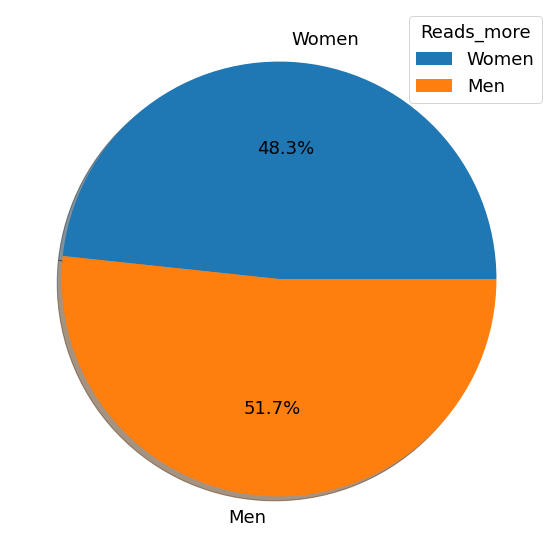

In [72]:
plt.pie(y4,labels=['Women','Men'],shadow=True,autopct='%1.1f%%')
plt.legend(title='Reads_more',loc='best')
plt.show()

#Type of books read by men and women...which is the highest

In [73]:
df_books

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
3025,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0,Books,DIY
3026,4116651679,270384,6/8/2013,6,5,1,1343,141.015,1484.015,TeleShop,11-05-1973,F,8.0,Books,DIY
3027,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3028,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3029,51750724947,273420,16-02-2014,6,5,2,791,166.110,1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,80633249807,267940,12/7/2011,3,5,4,1103,463.260,4875.260,TeleShop,09-06-1979,M,9.0,Books,Comics
22054,87103638186,270622,29-06-2011,3,5,5,1085,569.625,5994.625,TeleShop,13-06-1976,F,5.0,Books,Comics
22055,36133642880,272736,24-02-2011,3,5,3,173,54.495,573.495,e-Shop,19-04-1970,F,1.0,Books,Comics
22056,54971212536,269408,22-03-2011,3,5,3,563,177.345,1866.345,e-Shop,27-03-1989,F,8.0,Books,Comics


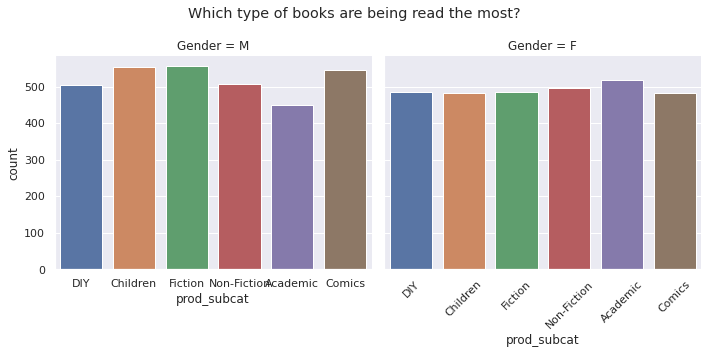

In [74]:
sns.set(font_scale=1)
sns.catplot(x='prod_subcat',col='Gender',data=df_books,kind='count')
plt.xticks(rotation=45)
plt.suptitle('Which type of books are being read the most?')
print()
plt.tight_layout()
plt.show()




*   We can clearly tell that men read more Fictional type books.

*   Women read more Academic type books as we can see from the plot.





#Which electronic good is selling the most?

In [75]:
df_elec1 = df.loc[df['prod_cat']=='Electronics']

In [76]:
df_elec1

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
2053,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0,Electronics,Personal Appliances
2054,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,09-10-1982,F,6.0,Electronics,Personal Appliances
2055,32524212369,275108,27-04-2013,8,3,5,699,366.975,3861.975,MBR,04-11-1971,F,8.0,Electronics,Personal Appliances
2056,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,27-11-1979,F,3.0,Electronics,Personal Appliances
2057,50076728598,269014,15-02-2014,8,3,4,581,244.020,2568.020,e-Shop,27-11-1979,F,3.0,Electronics,Personal Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18076,17963444132,274335,17-05-2011,9,3,4,582,244.440,2572.440,TeleShop,25-05-1974,F,5.0,Electronics,Cameras
18077,74975935384,274210,3/2/2011,9,3,5,475,249.375,2624.375,e-Shop,06-11-1982,M,3.0,Electronics,Cameras
18078,28400663785,267797,11/7/2011,9,3,4,1132,475.440,5003.440,e-Shop,10-08-1988,M,8.0,Electronics,Cameras
18079,27930823669,268388,4/5/2011,9,3,1,1036,108.780,1144.780,e-Shop,17-03-1976,M,8.0,Electronics,Cameras


In [77]:
count5 = df_elec1.groupby('prod_subcat')['Qty'].sum()

In [78]:
count5

prod_subcat
Audio and video        2486
Cameras                2413
Computers              2395
Mobiles                2591
Personal Appliances    2433
Name: Qty, dtype: int64

In [79]:
y5 = np.array(count5)

In [80]:
rcParams['font.size']= 14

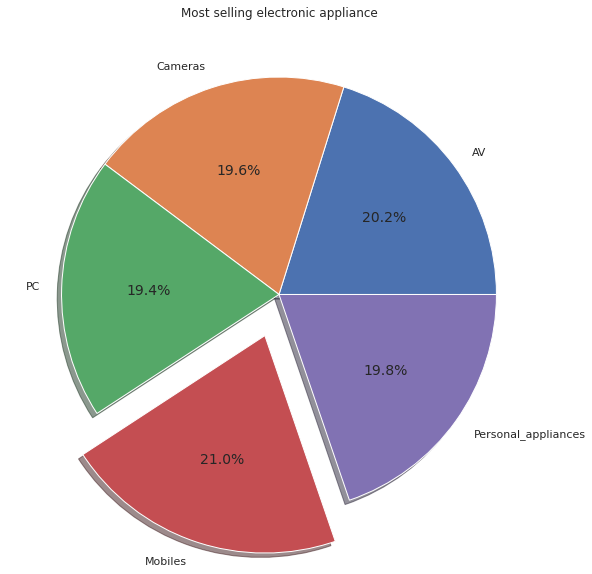

In [81]:
plt.figure(figsize=(14,10))
plt.pie(y5,labels=['AV','Cameras','PC','Mobiles','Personal_appliances'],shadow=True,autopct='%1.1f%%',explode=[0,0,0,0.2,0])
plt.title('Most selling electronic appliance')
plt.show()

#What is the total amount spent by customers between 1st January 2012 and 31st December 2012?

In [82]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [ ]:
df['tran_date'] = pd.to_datetime(df['tran_date'],infer_datetime_format=True)

In [84]:
df.dtypes

transaction_id                int64
customer_Id                   int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
DOB                          object
Gender                       object
city_code                   float64
prod_cat                     object
prod_subcat                  object
dtype: object

In [85]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [86]:
import datetime as dt

In [87]:
df_sorted = df.sort_values('tran_date')

In [88]:
df_sorted

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
12046,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,29-07-1978,M,7.0,Electronics,Audio and video
14287,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,25-05-1990,M,5.0,Home and kitchen,Furnishing
14272,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,14-05-1974,M,9.0,Home and kitchen,Furnishing
1819,96261500165,270582,2011-01-02,3,2,2,734,154.140,1622.140,Flagship store,01-07-1974,M,5.0,Footwear,Women
18391,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,05-11-1984,M,4.0,Footwear,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,22-06-1987,F,10.0,Home and kitchen,Tools
7062,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,25-04-1979,M,3.0,Books,Children
6007,89214951500,273322,2014-12-02,12,6,1,1166,122.430,1288.430,TeleShop,10-06-1983,F,1.0,Home and kitchen,Tools
14160,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,25-06-1970,M,3.0,Home and kitchen,Furnishing


In [89]:
df_sor = df_sorted.reset_index(drop=True)

In [90]:
df_sor

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,29-07-1978,M,7.0,Electronics,Audio and video
1,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,25-05-1990,M,5.0,Home and kitchen,Furnishing
2,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,14-05-1974,M,9.0,Home and kitchen,Furnishing
3,96261500165,270582,2011-01-02,3,2,2,734,154.140,1622.140,Flagship store,01-07-1974,M,5.0,Footwear,Women
4,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,05-11-1984,M,4.0,Footwear,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,22-06-1987,F,10.0,Home and kitchen,Tools
23036,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,25-04-1979,M,3.0,Books,Children
23037,89214951500,273322,2014-12-02,12,6,1,1166,122.430,1288.430,TeleShop,10-06-1983,F,1.0,Home and kitchen,Tools
23038,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,25-06-1970,M,3.0,Home and kitchen,Furnishing


In [96]:
df_date = df_sor.loc[df_sor['tran_date']>='2012-01-01'][df_sor['tran_date']<='2012-12-31']

<ipython-input-96-503f0bca9bf0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_date = df_sor.loc[df_sor['tran_date']>='2012-01-01'][df_sor['tran_date']<='2012-12-31']


In [102]:
df_date.shape

(7534, 15)

In [103]:
df_date1 = df_sor.loc[df_sor['tran_date']>='2013-01-01'][df_sor['tran_date']<='2013-12-31']

<ipython-input-103-9febbbe71644>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_date1 = df_sor.loc[df_sor['tran_date']>='2013-01-01'][df_sor['tran_date']<='2013-12-31']


In [104]:
df_date1.shape

(7454, 15)

In [105]:
df

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


#Total amount spent in the year 2012

In [112]:
total_amount_1year = round(sum(df_date['total_amt']),2)

In [113]:
total_amount_1year

15918256.51

In [114]:
print(f"The total amount spent by the customers in the year 2012 is {total_amount_1year}")

The total amount spent by the customers in the year 2012 is 15918256.51


#Time period for the transaction data

In [127]:
df_sor

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,29-07-1978,M,7.0,Electronics,Audio and video
1,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,25-05-1990,M,5.0,Home and kitchen,Furnishing
2,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,14-05-1974,M,9.0,Home and kitchen,Furnishing
3,96261500165,270582,2011-01-02,3,2,2,734,154.140,1622.140,Flagship store,01-07-1974,M,5.0,Footwear,Women
4,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,05-11-1984,M,4.0,Footwear,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,22-06-1987,F,10.0,Home and kitchen,Tools
23036,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,25-04-1979,M,3.0,Books,Children
23037,89214951500,273322,2014-12-02,12,6,1,1166,122.430,1288.430,TeleShop,10-06-1983,F,1.0,Home and kitchen,Tools
23038,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,25-06-1970,M,3.0,Home and kitchen,Furnishing


In [128]:
trans = pd.Series(df_sor['tran_date'])

In [130]:
trans

0       2011-01-02
1       2011-01-02
2       2011-01-02
3       2011-01-02
4       2011-01-02
           ...    
23035   2014-12-02
23036   2014-12-02
23037   2014-12-02
23038   2014-12-02
23039   2014-12-02
Name: tran_date, Length: 23040, dtype: datetime64[ns]

In [129]:
first = trans[trans.size-1]
last = trans[0]
Time_period = last-first
Time_period

Timedelta('-1430 days +00:00:00')

In [133]:
print(f"The transaction data available has a time period of {abs(Time_period)}")

The transaction data available has a time period of 1430 days 00:00:00


#Count of transactions where transaction amount was negative

In [109]:
count_neg = df.loc[df['total_amt']<0,'transaction_id'].count()

In [111]:
print(f"Count of transactions where transaction amount was negative is {count_neg}")

Count of transactions where transaction amount was negative is 2164


In [99]:
total_amount_1year = round(sum(df_date['total_amt']),2)

In [100]:
total_amount_1year

15918256.51

In [101]:
print(f"The total amount spent by the customers in the year 2012 is {total_amount_1year}")

The total amount spent by the customers in the year 2012 is 15918256.51


#Histogram generation for all continous variables

In [116]:
cols_numer = df._get_numeric_data().columns

In [117]:
cols_numer

Index(['transaction_id', 'customer_Id', 'prod_sub_cat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'city_code'],
      dtype='object')

In [118]:
cols_n = ['Qty', 'Rate', 'Tax', 'total_amt']

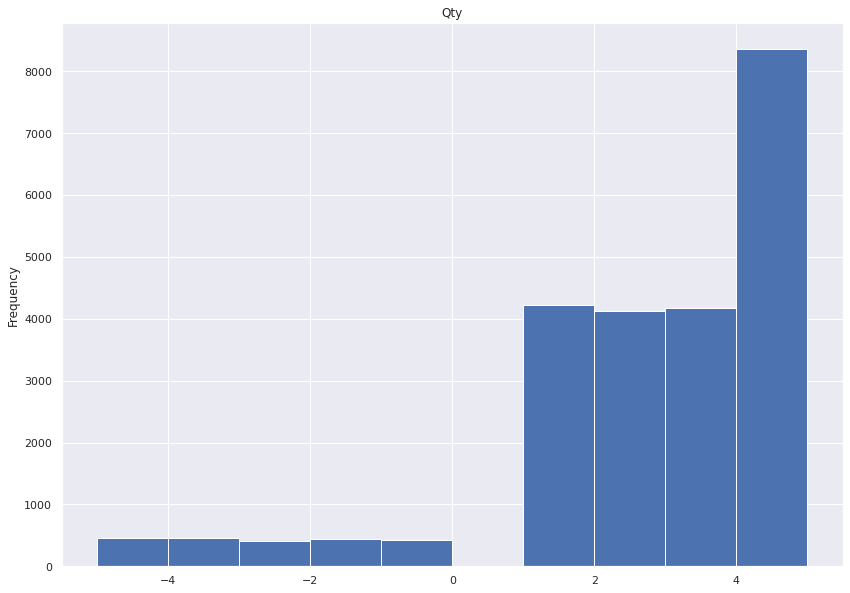

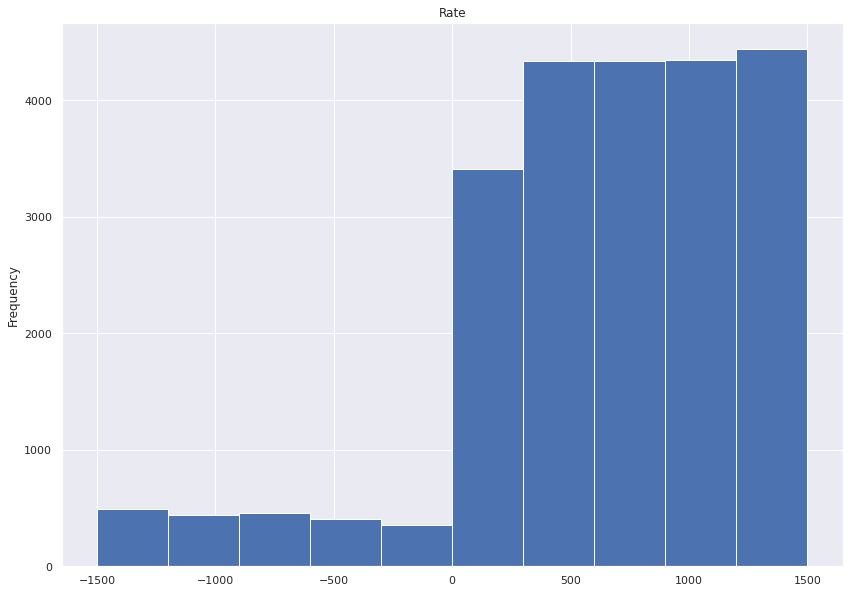

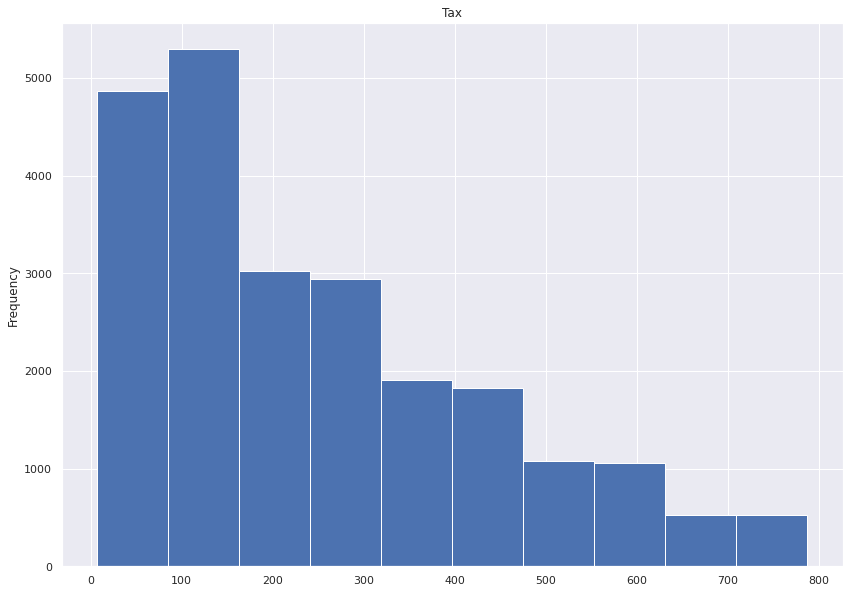

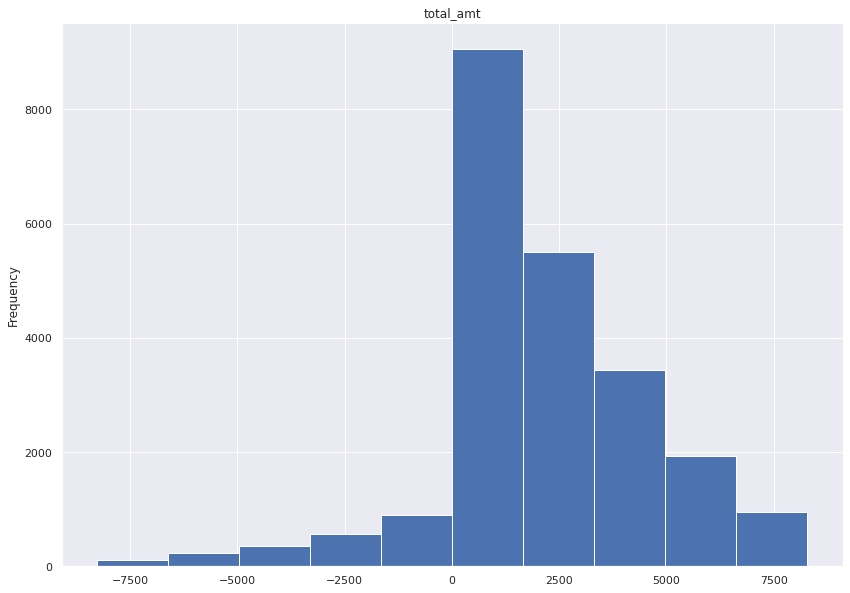

In [119]:
for i in cols_n:
  df[i].plot(kind='hist')
  plt.title(i)
  plt.show()


From the plots we can infer:


*   The Quantity histogram plot tells us that the data is left skewed, more data is concentrated on the positive side.
*   The Rate data is left skewed. 


*   The tax data is right skewed but it shows only positive values because tax in practical cannot be negative.
*   The total amount is left skewed.Frequency of amount between 0 and 2500 is higher. We can infer low priced goods has been sold more.







#Visualization for categorical variables

In [120]:
cols_cat = df.select_dtypes(include=['object']).columns



In [121]:
cols_cat

Index(['Store_type', 'DOB', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

In [122]:
cols_cat = ['Store_type','Gender', 'prod_cat', 'prod_subcat']

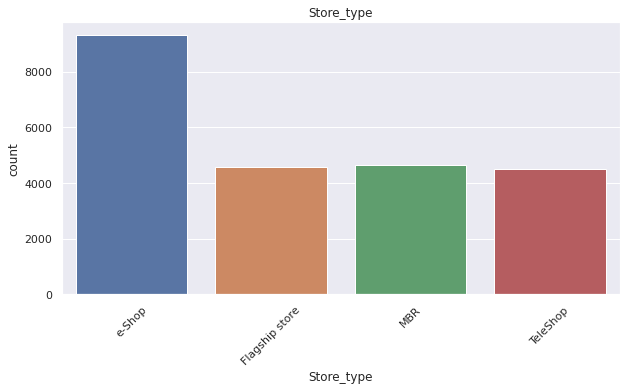

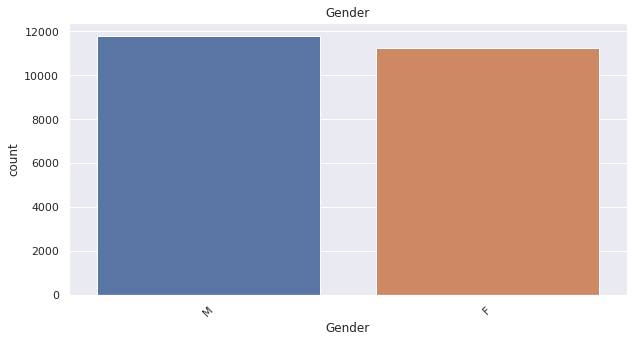

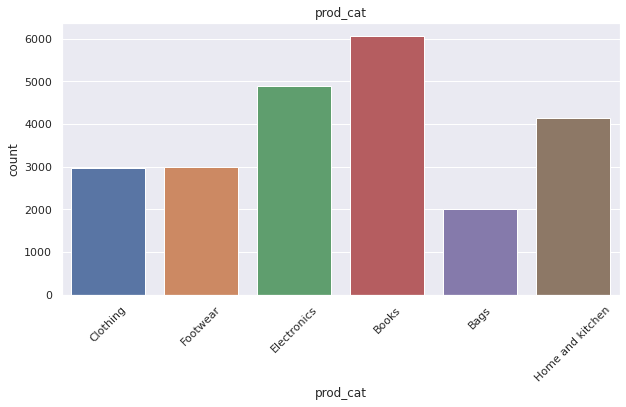

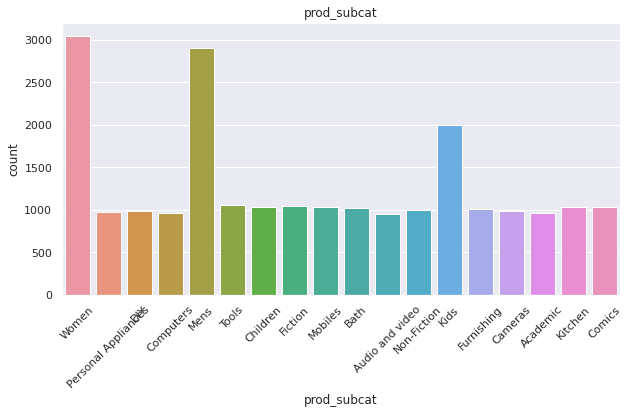

In [125]:
for i in cols_cat:
  plt.subplots(figsize=(10,5))
  plt.xticks(rotation=45)
  plt.title(i)
  sns.countplot(x=df[i])
  plt.show()
